# Importing libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Importing data

In [5]:
path = r'C:\Users\thoma\OneDrive\Dokumente\data analytics\ML_Ach1\ClimateWins'

In [6]:
path

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\ML_Ach1\\ClimateWins'

In [7]:
df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'))
Pleasant_weather = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Pleasant_weather.pkl'))

In [8]:
df.shape

(22950, 170)

In [9]:
Pleasant_weather.shape

(22950, 15)

# Joining data sets

In [10]:
# Joining data sets & resetting the index
df = df.reset_index(drop=True)
Pleasant_weather = Pleasant_weather.reset_index(drop=True)

df_joined = df.join(Pleasant_weather)

# Hirarchical Clustering

# Unscaled Single Method (2010-2019)

In [11]:
# Reducing the dataset to a decade
df_2010_2019 = df_joined[df_joined['DATE'].astype(str).str.contains(r'^201')]
df_2010_2019

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
18263,20100101,1,8,2.3,0.93,0.9965,0.18,0.56,0,0.0,...,0,0,0,0,0,0,0,0,0,0
18264,20100102,1,3,3.0,0.74,1.0193,0.58,0.00,1,5.2,...,0,0,0,0,0,0,0,0,0,0
18265,20100103,1,3,1.7,0.75,1.0226,0.61,0.00,0,6.3,...,0,0,0,0,0,0,0,0,0,0
18266,20100104,1,5,1.0,0.83,1.0169,0.48,0.00,0,3.7,...,0,0,0,0,0,0,0,0,0,0
18267,20100105,1,7,1.4,0.78,1.0073,0.53,0.04,0,4.4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,12,8,1.5,0.92,1.0273,0.15,0.52,0,0.1,...,0,0,0,0,0,0,0,0,0,0
21911,20191228,12,7,1.9,0.86,1.0380,0.35,0.00,0,1.3,...,0,0,0,0,0,0,0,0,0,0
21912,20191229,12,6,1.1,0.93,1.0387,0.61,0.00,0,4.9,...,0,0,0,0,0,0,0,0,0,0
21913,20191230,12,1,1.8,0.81,1.0354,0.64,0.00,0,6.5,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Dropping 'DATE' & 'MONTH' columns
Weather_stations_2010_2019 = df_2010_2019.drop(['DATE','MONTH'], axis=1)

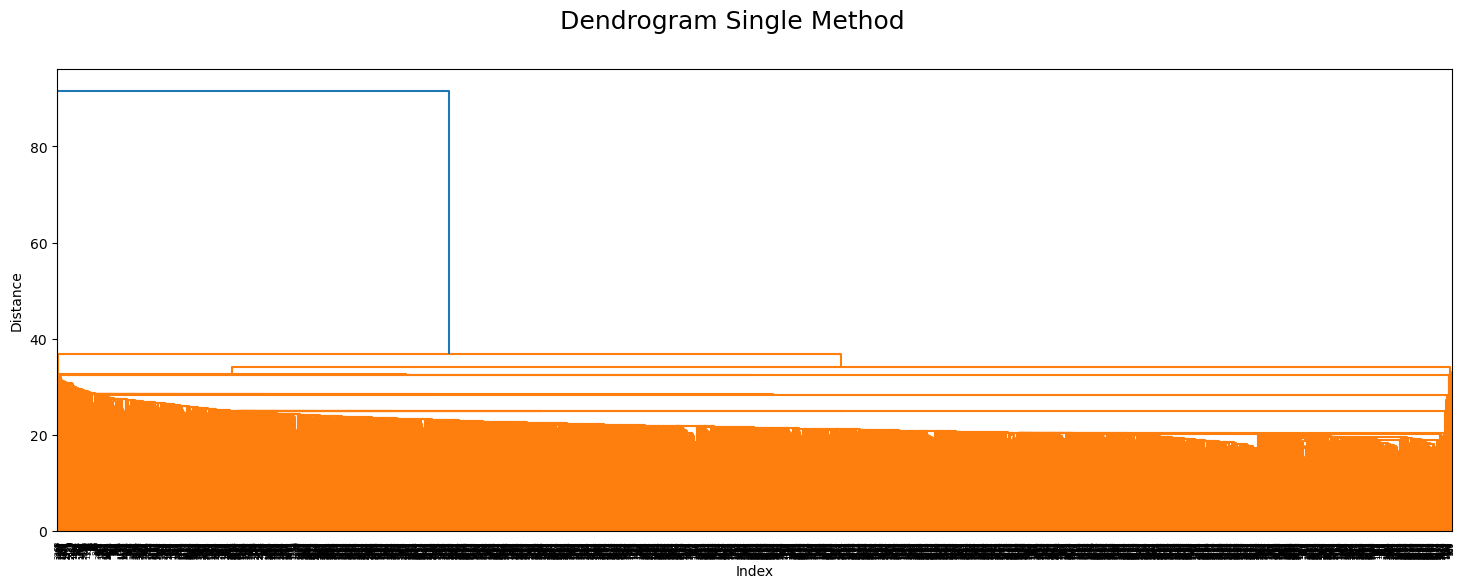

In [167]:
distance_single = linkage(Weather_stations_2010_2019, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

# -> No discernable pattern

# -> Changing from decade to year

# -> Unscaled Single Method (2015)

In [168]:
# Reducing the dataset to a year
df_2015 = df_joined[df_joined['DATE'].astype(str).str.contains('2015')]
df_2015

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
20089,20150101,1,3,1.6,0.75,1.0382,0.74,0.00,7,1.0,...,0,0,0,0,0,0,0,0,0,0
20090,20150102,1,6,1.5,0.75,1.0377,0.62,0.14,6,5.2,...,0,0,0,0,0,0,0,0,0,0
20091,20150103,1,7,3.0,0.90,1.0288,0.71,0.72,2,0.0,...,0,0,0,0,0,0,0,0,0,0
20092,20150104,1,4,2.0,0.81,1.0342,0.82,0.00,0,3.7,...,0,0,0,0,0,0,0,0,0,0
20093,20150105,1,0,1.6,0.81,1.0346,0.79,0.00,0,6.9,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20449,20151227,12,3,2.2,0.85,1.0331,0.71,0.00,0,6.5,...,0,0,0,0,0,0,0,0,0,0
20450,20151228,12,4,2.7,0.75,1.0292,0.71,0.00,0,6.6,...,0,0,0,0,0,0,0,0,0,0
20451,20151229,12,5,2.1,0.85,1.0303,0.71,0.00,0,4.3,...,0,0,0,0,0,0,0,0,0,0
20452,20151230,12,3,2.7,0.88,1.0272,0.72,0.00,0,6.1,...,0,0,0,0,0,0,0,0,0,0


In [169]:
# Dropping 'DATE' & 'MONTH' columns
Weather_stations_2015 = df_2015.drop(['DATE','MONTH'], axis=1)

In [170]:
Weather_stations_2015.shape

(365, 183)

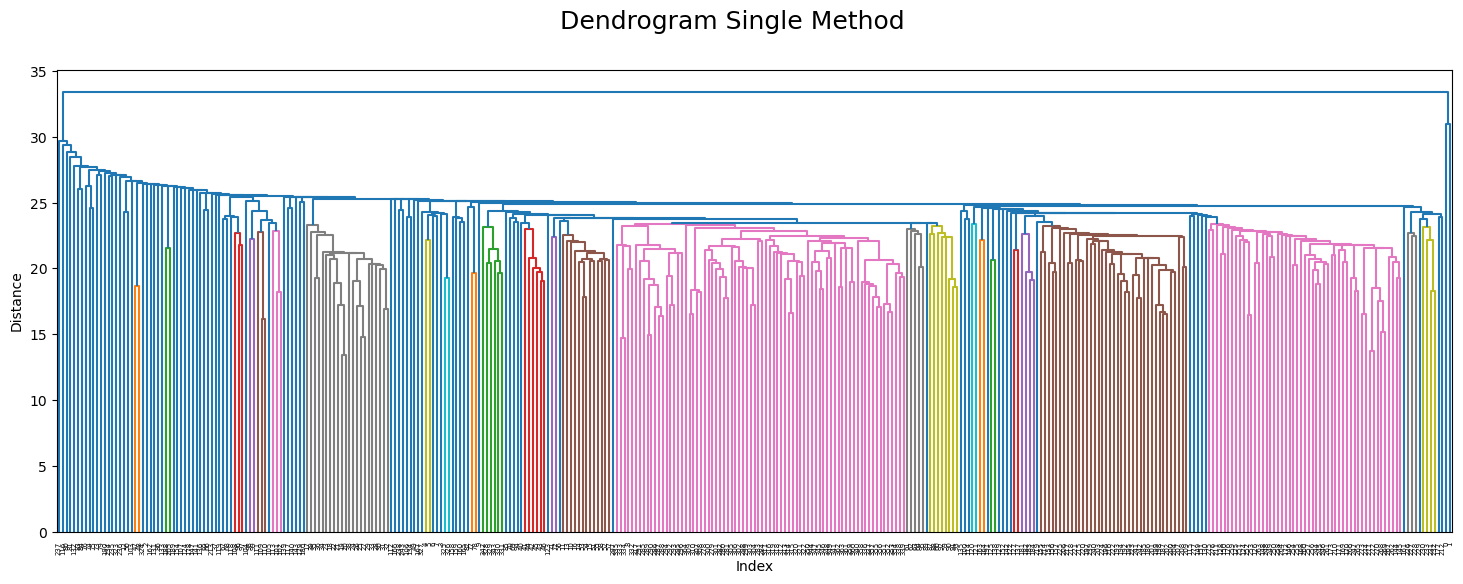

In [171]:
distance_single = linkage(Weather_stations_2015, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

# -> about 10 clusters

# Scaling

In [172]:
scaler = StandardScaler()

In [173]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['DATE'] = df['DATE']
df_scaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,19600102,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,19600103,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,19600104,-1.599964,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,-0.179228,-0.114186,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,19600105,-1.599964,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,-0.179228,0.187388,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [174]:
# Joining again
df_joined = df_scaled.join(Pleasant_weather)

In [175]:
# Reducing to 2015
df_scaled_2015 = df_joined[df_joined['DATE'].astype(str).str.contains('2015')]
df_scaled_2015

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
20089,20150101,-1.599964,-1.001953,-0.710422,-0.077273,3.085431,-0.650005,-0.445514,3.309978,-0.833324,...,0,0,0,0,0,0,0,0,0,0
20090,20150102,-1.599964,0.244897,-0.846921,-0.077273,3.009010,-0.778880,-0.164944,2.811520,0.140992,...,0,0,0,0,0,0,0,0,0,0
20091,20150103,-1.599964,0.660514,1.200556,1.277781,1.648729,-0.682224,0.997417,0.817688,-1.065304,...,0,0,0,0,0,0,0,0,0,0
20092,20150104,-1.599964,-0.586336,-0.164429,0.464749,2.474068,-0.564088,-0.445514,-0.179228,-0.206978,...,0,0,0,0,0,0,0,0,0,0
20093,20150105,-1.599964,-2.248803,-0.710422,0.464749,2.535205,-0.596307,-0.445514,-0.179228,0.535359,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20449,20151227,1.594371,-1.001953,0.108568,0.826097,2.305944,-0.682224,-0.445514,-0.179228,0.442567,...,0,0,0,0,0,0,0,0,0,0
20450,20151228,1.594371,-0.586336,0.791061,-0.077273,1.709866,-0.682224,-0.445514,-0.179228,0.465765,...,0,0,0,0,0,0,0,0,0,0
20451,20151229,1.594371,-0.170720,-0.027930,0.826097,1.877990,-0.682224,-0.445514,-0.179228,-0.067790,...,0,0,0,0,0,0,0,0,0,0
20452,20151230,1.594371,-1.001953,0.791061,1.097107,1.404185,-0.671484,-0.445514,-0.179228,0.349774,...,0,0,0,0,0,0,0,0,0,0


In [176]:
# Dropping 'DATE' & 'MONTH' columns
Weather_stations_scaled_2015 = df_scaled_2015.drop(['DATE','MONTH'], axis=1)

In [177]:
Weather_stations_scaled_2015.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
20089,-1.001953,-0.710422,-0.077273,3.085431,-0.650005,-0.445514,3.309978,-0.833324,-1.818785,-2.056569,...,0,0,0,0,0,0,0,0,0,0
20090,0.244897,-0.846921,-0.077273,3.009010,-0.778880,-0.164944,2.811520,0.140992,-1.615075,-1.581399,...,0,0,0,0,0,0,0,0,0,0
20091,0.660514,1.200556,1.277781,1.648729,-0.682224,0.997417,0.817688,-1.065304,-0.678010,-0.799668,...,0,0,0,0,0,0,0,0,0,0
20092,-0.586336,-0.164429,0.464749,2.474068,-0.564088,-0.445514,-0.179228,-0.206978,-0.922462,-1.228854,...,0,0,0,0,0,0,0,0,0,0
20093,-2.248803,-0.710422,0.464749,2.535205,-0.596307,-0.445514,-0.179228,0.535359,-1.370624,-1.382134,...,0,0,0,0,0,0,0,0,0,0


# Scaled Single Method (2015)

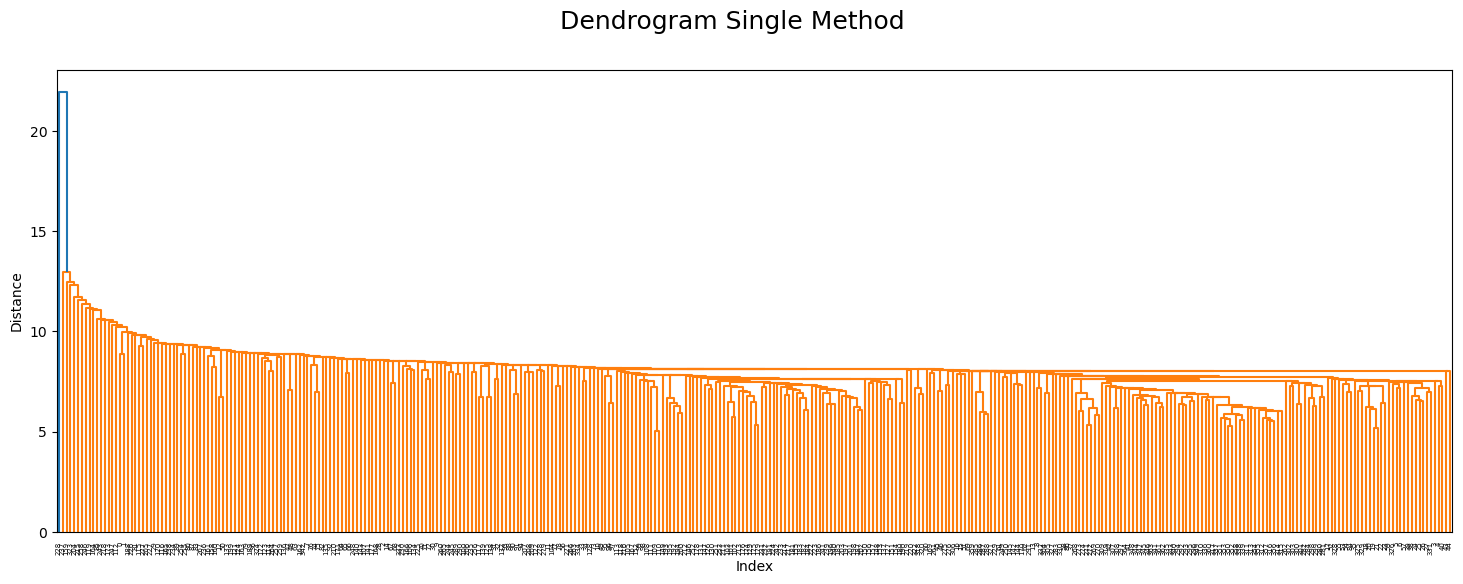

In [178]:
distance_single = linkage(Weather_stations_scaled_2015, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

# -> 1 cluster

# Other Methods:
# Scaled Complete Method (2015)

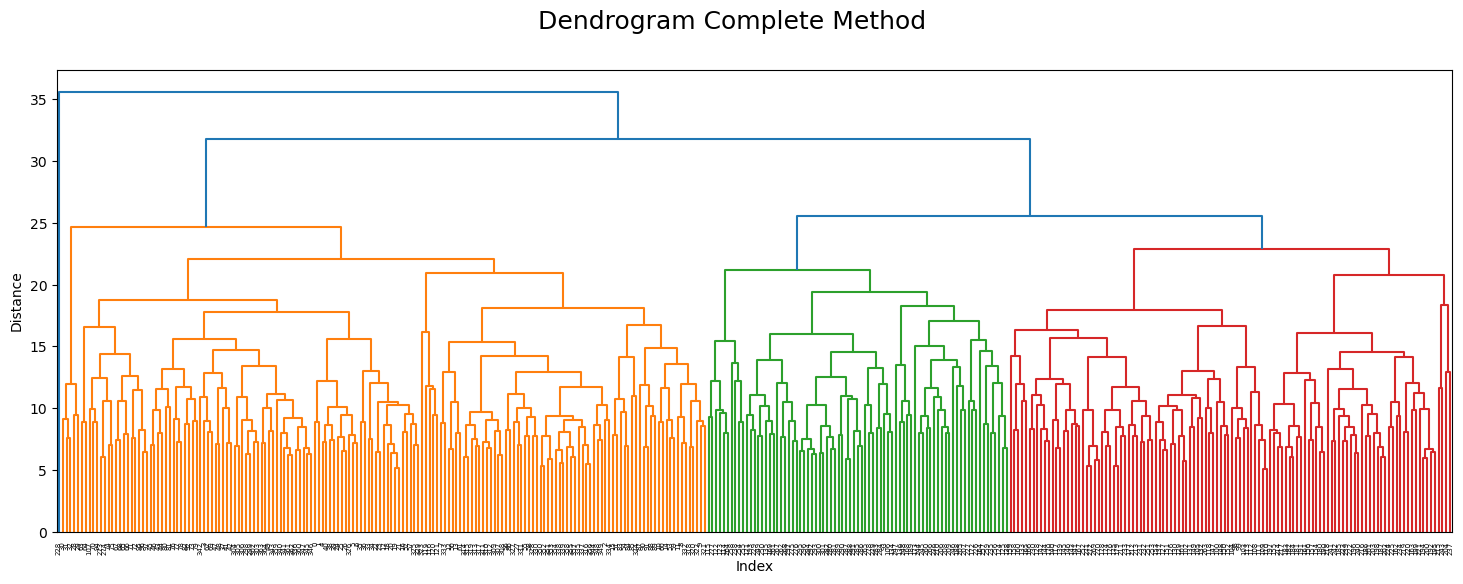

In [179]:
distance_complete = linkage(Weather_stations_scaled_2015, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

# -> 3 clusters

# Unscaled Complete Method (2015)

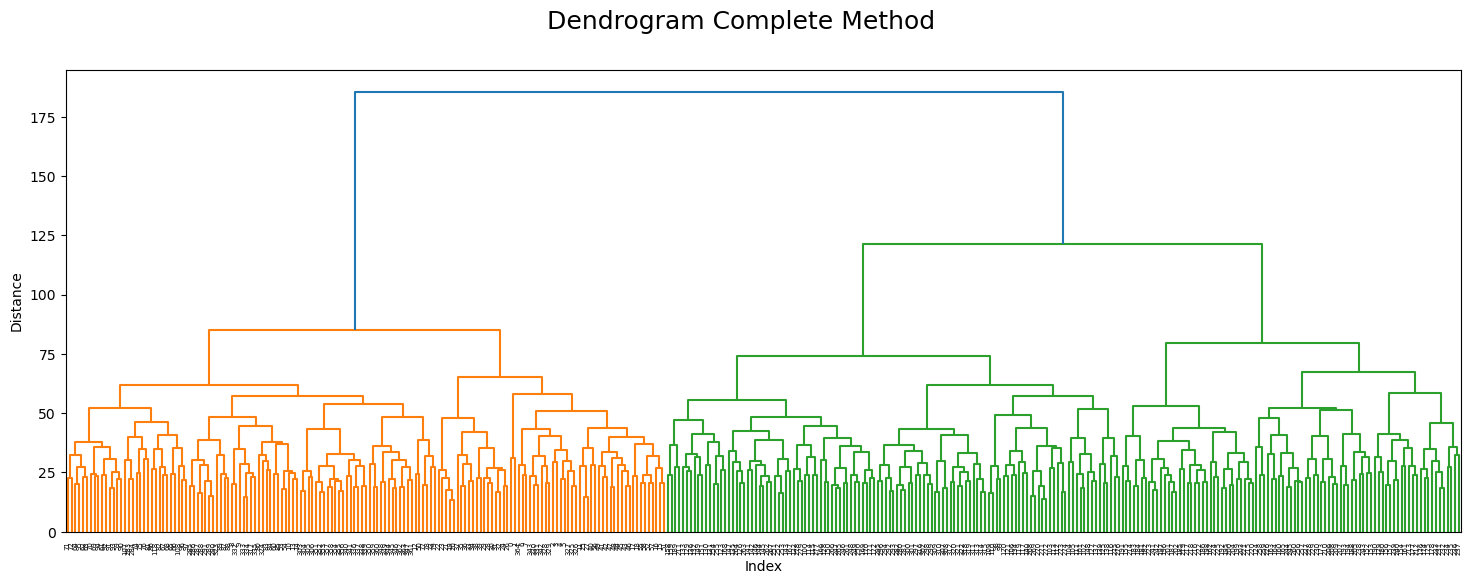

In [180]:
distance_complete = linkage(Weather_stations_2015, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_complete, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

# -> 2 clusters

# Scaled Average Method (2015)

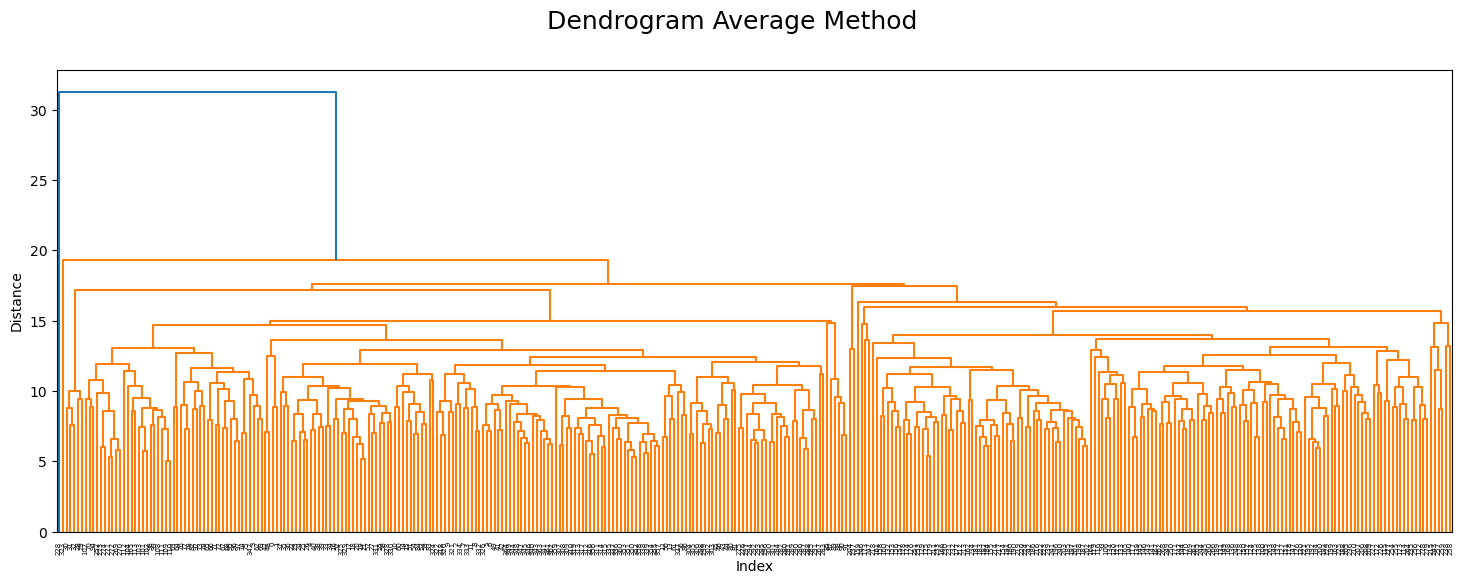

In [181]:
distance_average = linkage(Weather_stations_scaled_2015, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

# -> 1 cluster

# Unscaled Average Method (2015)

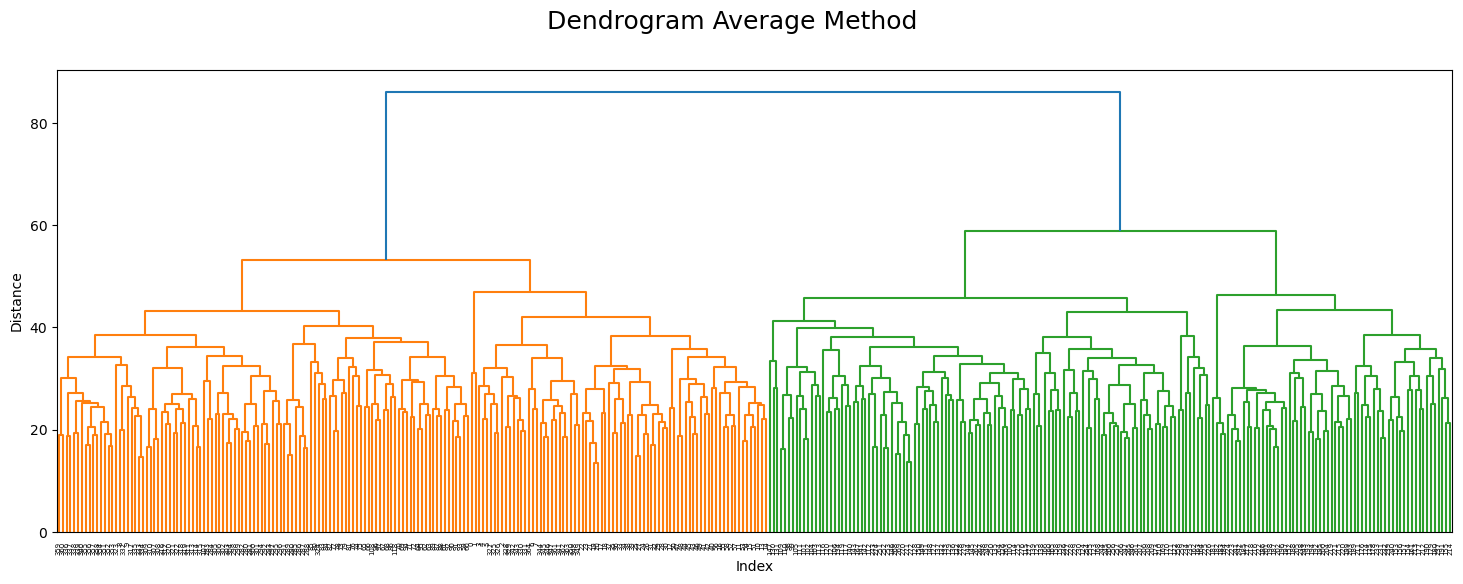

In [182]:
distance_average = linkage(Weather_stations_2015, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_average, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

# -> 2 clusters

# Scaled Ward Method (2015)

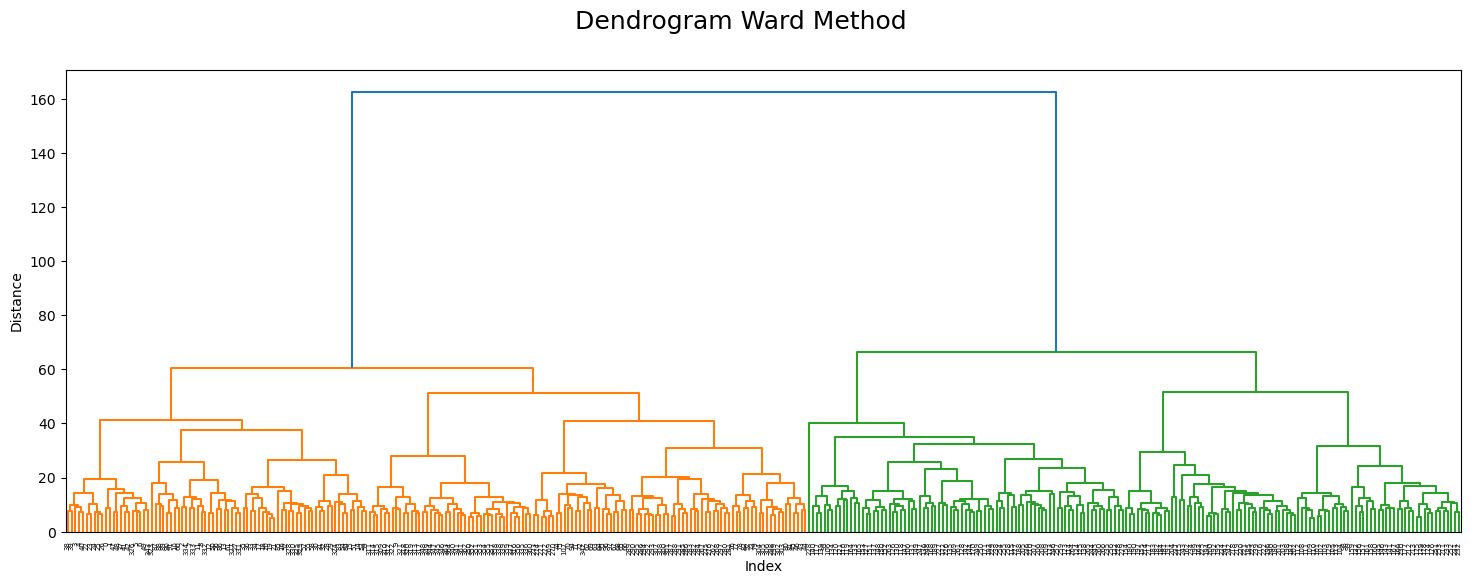

In [183]:
distance_ward = linkage(Weather_stations_scaled_2015, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

# -> 2 clusters

# Unscaled Ward Method (2015)

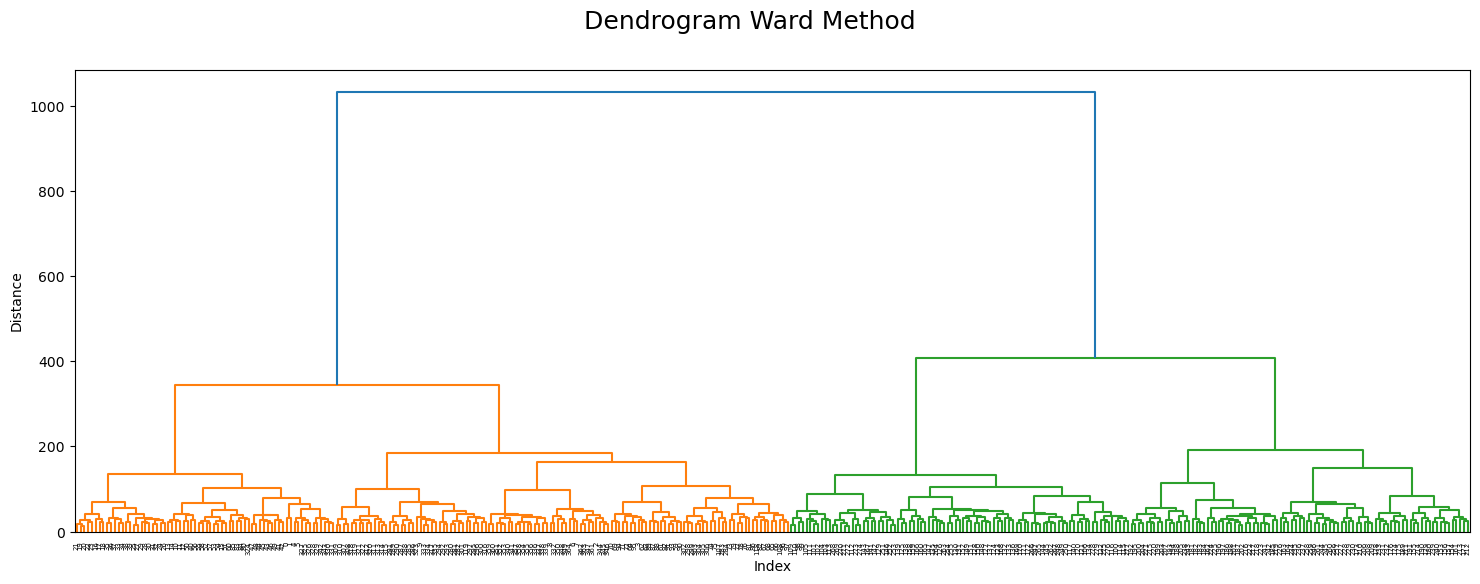

In [184]:
distance_ward = linkage(Weather_stations_2015, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

# -> 2 clusters

# Adding/assigning 4 clusters based on seasons

In [199]:
# Assigning 4 clusters to the data set
df_4_clusters = Weather_stations_scaled_2015.copy()

df_4_clusters['clust4']=fcluster(distance_complete, 4, criterion='maxclust')
df_4_clusters.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,clust4
20089,-1.001953,-0.710422,-0.077273,3.085431,-0.650005,-0.445514,3.309978,-0.833324,-1.818785,-2.056569,...,0,0,0,0,0,0,0,0,0,2
20090,0.244897,-0.846921,-0.077273,3.009010,-0.778880,-0.164944,2.811520,0.140992,-1.615075,-1.581399,...,0,0,0,0,0,0,0,0,0,2
20091,0.660514,1.200556,1.277781,1.648729,-0.682224,0.997417,0.817688,-1.065304,-0.678010,-0.799668,...,0,0,0,0,0,0,0,0,0,2
20092,-0.586336,-0.164429,0.464749,2.474068,-0.564088,-0.445514,-0.179228,-0.206978,-0.922462,-1.228854,...,0,0,0,0,0,0,0,0,0,2
20093,-2.248803,-0.710422,0.464749,2.535205,-0.596307,-0.445514,-0.179228,0.535359,-1.370624,-1.382134,...,0,0,0,0,0,0,0,0,0,2


In [200]:
df_4_clusters.shape

(365, 184)

# 3 x 5 grid of scatterplots with added clusters

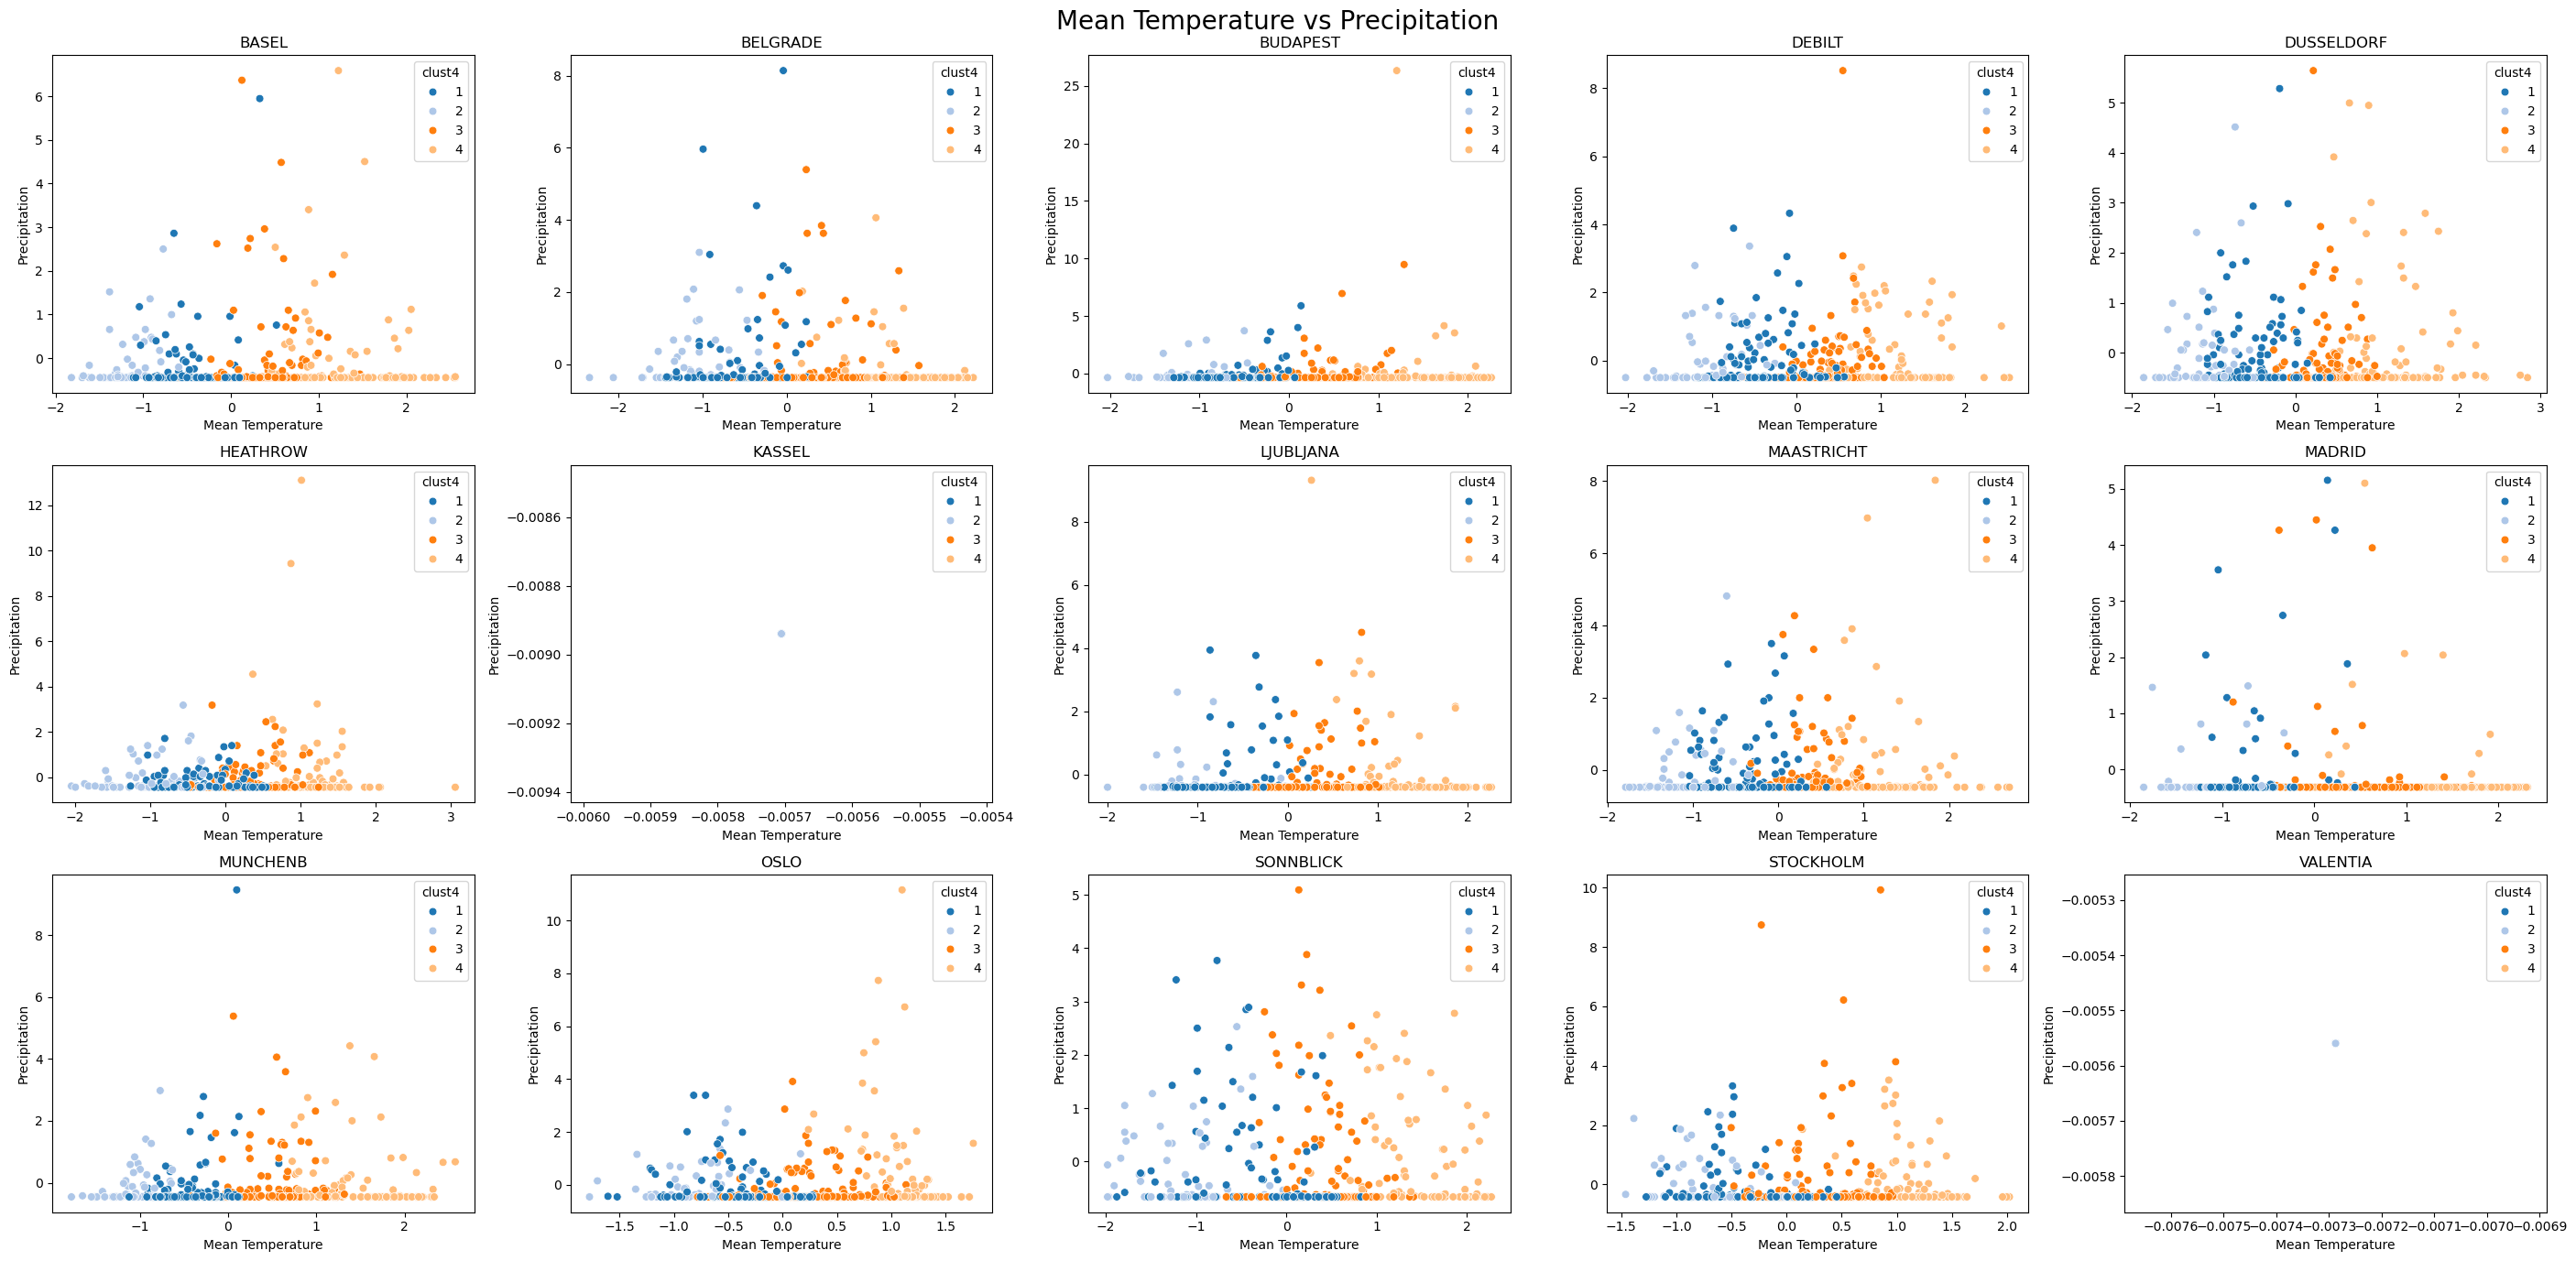

In [202]:
# Scatterplots - all weather stations

# Station names
stations = [col.replace("_pleasant_weather","") for col in df_4_clusters.columns if col.endswith("_pleasant_weather")]
stations.sort()

# Creating the figure
fig, axes = plt.subplots(3, 5, figsize=(28, 14))
fig.suptitle("Mean Temperature vs Precipitation", fontsize=20)

# Looping over stations
for i, station in enumerate(stations):

    row = i // 5
    col = i % 5
    ax = axes[row, col]

    # column names
    x_var = station + "_temp_mean"
    y_var = station + "_precipitation"

    # scatterplot
    sns.scatterplot(x=x_var, y=y_var, data=df_4_clusters, hue=df_4_clusters['clust4'], palette="tab20", ax=ax, s=40)

    ax.set_title(station)
    ax.set_xlabel("Mean Temperature")
    ax.set_ylabel("Precipitation")

plt.tight_layout()
plt.show()

# Principal Component Analysis - PCA - random reduction to 143 components

In [187]:
# Running the PCA model, while reducing to 143 components
pca = PCA(n_components=143)
principalComponents = pca.fit_transform(Weather_stations_scaled_2015)

In [188]:
principalComponents

array([[-1.12306414e+01,  4.90226189e+00,  2.18549266e+00, ...,
         5.05736491e-03, -3.39091880e-03, -6.66200116e-03],
       [-9.18897401e+00,  2.65866299e+00,  1.82126795e+00, ...,
        -2.11052393e-03, -2.77525910e-02,  2.70283020e-02],
       [-9.55437806e+00, -9.16352477e-01,  7.21658284e-01, ...,
        -3.51846886e-02,  2.95352478e-03, -2.92187033e-02],
       ...,
       [-8.19942589e+00,  3.16345052e+00,  4.15722284e+00, ...,
         5.63126468e-02,  3.34566331e-02, -5.51796960e-02],
       [-8.61810927e+00,  2.12627201e+00,  4.38471598e+00, ...,
        -2.27938433e-02,  7.83636654e-03,  5.88933228e-02],
       [-8.21905773e+00,  1.48126634e+00,  2.64524811e+00, ...,
         5.55637203e-02,  3.13860011e-02,  1.04285315e-02]])

In [189]:
df_PCA = pd.DataFrame(principalComponents, columns=[f"PCA{i+1}" for i in range(principalComponents.shape[1])])

In [190]:
df_PCA.shape

(365, 143)

In [191]:
df_PCA

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA134,PCA135,PCA136,PCA137,PCA138,PCA139,PCA140,PCA141,PCA142,PCA143
0,-11.230641,4.902262,2.185493,0.797788,-1.736712,0.708113,-1.410147,0.653366,0.219259,-2.263079,...,-0.011837,0.011744,-0.011259,-0.037319,0.035436,0.018310,-0.058194,0.005057,-0.003391,-0.006662
1,-9.188974,2.658663,1.821268,0.872002,-3.272374,1.596623,-0.720039,-1.100458,-0.462477,0.238381,...,0.003046,0.023399,0.031260,0.035613,0.006373,0.011607,0.065569,-0.002111,-0.027753,0.027028
2,-9.554378,-0.916352,0.721658,2.248462,-1.623347,-0.115501,-1.938840,-3.438016,-0.709859,-1.141878,...,-0.064643,-0.013113,-0.034195,0.013121,0.017306,-0.066840,-0.020166,-0.035185,0.002954,-0.029219
3,-8.325571,4.310743,-0.750445,2.462635,-0.795240,-0.648597,-1.967525,-1.505026,-1.259276,-0.179568,...,-0.068274,0.111351,-0.043447,-0.007018,0.017885,-0.041635,0.010631,0.049443,0.029371,0.015960
4,-9.754916,3.833588,0.317640,1.714007,-0.934317,-1.852324,-0.981499,0.668455,-0.710421,-2.356211,...,0.024556,0.040359,0.046376,0.000690,-0.053362,-0.036151,-0.008782,-0.026904,-0.023164,-0.022651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-6.130428,1.747870,6.732939,-0.394749,0.071242,1.167430,-0.153647,-0.434930,0.704756,-0.377615,...,0.045188,0.037198,0.021479,0.071822,0.050007,-0.005999,-0.072332,-0.021133,0.010748,0.013210
361,-6.436254,4.066195,4.255332,-0.522469,1.625079,2.078920,0.814931,-0.031029,0.901393,1.912026,...,-0.058932,0.085050,-0.100373,-0.041578,0.018560,-0.036542,-0.024090,-0.060950,0.069859,0.018857
362,-8.199426,3.163451,4.157223,1.189849,1.488248,2.152606,1.116238,0.180740,-0.100067,-0.439455,...,-0.072782,0.007293,-0.019075,0.054093,-0.008244,-0.006576,-0.060399,0.056313,0.033457,-0.055180
363,-8.618109,2.126272,4.384716,-0.360696,1.675227,3.382520,0.751115,-0.575985,0.629315,0.692935,...,-0.010011,0.008616,0.028957,0.057140,0.006098,-0.036439,0.008586,-0.022794,0.007836,0.058893


In [192]:
# Exporting
df_PCA.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'PCA(143).csv'))

# PCA with just 15 components based on the number of weather stations

In [193]:
# Running the PCA model, while reducing to 15 components
pca2 = PCA(n_components=15)
principalComponents2 = pca2.fit_transform(Weather_stations_scaled_2015)

In [194]:
principalComponents2

array([[-1.12306414e+01,  4.90226189e+00,  2.18549266e+00, ...,
         2.99952673e-02, -1.51141244e+00, -1.23700349e+00],
       [-9.18897401e+00,  2.65866299e+00,  1.82126795e+00, ...,
         2.94465474e-01, -2.81539488e+00,  2.64981024e-01],
       [-9.55437806e+00, -9.16352477e-01,  7.21658284e-01, ...,
        -1.47499801e+00, -1.10460004e+00, -1.02911003e+00],
       ...,
       [-8.19942589e+00,  3.16345052e+00,  4.15722284e+00, ...,
        -1.23404946e+00,  2.15443029e-03,  1.63000475e+00],
       [-8.61810927e+00,  2.12627201e+00,  4.38471598e+00, ...,
         1.79986862e+00,  1.21970505e+00,  9.27438411e-01],
       [-8.21905773e+00,  1.48126634e+00,  2.64524811e+00, ...,
         8.98655937e-01, -3.09852429e-01,  1.89152825e+00]])

In [195]:
df_PCA2 = pd.DataFrame(principalComponents2, columns=[f"PCA{i+1}" for i in range(principalComponents2.shape[1])])

In [196]:
df_PCA2.shape

(365, 15)

In [197]:
df_PCA2

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15
0,-11.230641,4.902262,2.185493,0.797788,-1.736712,0.708113,-1.410147,0.653366,0.219259,-2.263079,-3.410083,1.362440,0.029995,-1.511412,-1.237003
1,-9.188974,2.658663,1.821268,0.872002,-3.272374,1.596623,-0.720039,-1.100458,-0.462477,0.238381,0.013919,0.571732,0.294465,-2.815395,0.264981
2,-9.554378,-0.916352,0.721658,2.248462,-1.623347,-0.115501,-1.938840,-3.438016,-0.709859,-1.141878,-0.466451,0.614269,-1.474998,-1.104600,-1.029110
3,-8.325571,4.310743,-0.750445,2.462635,-0.795240,-0.648597,-1.967525,-1.505026,-1.259276,-0.179568,-1.427013,0.126593,1.856909,1.465092,-2.088262
4,-9.754916,3.833588,0.317640,1.714007,-0.934317,-1.852324,-0.981499,0.668455,-0.710421,-2.356211,-2.249450,1.677843,1.067126,1.315811,-1.532333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-6.130428,1.747870,6.732939,-0.394749,0.071242,1.167430,-0.153647,-0.434930,0.704756,-0.377615,-1.472755,-1.434048,-1.054921,-0.607061,0.782111
361,-6.436254,4.066195,4.255332,-0.522469,1.625079,2.078920,0.814931,-0.031029,0.901393,1.912026,0.742355,-0.447461,-0.035539,-0.648266,0.364085
362,-8.199426,3.163451,4.157223,1.189849,1.488248,2.152606,1.116238,0.180740,-0.100067,-0.439455,1.135251,-0.371563,-1.234049,0.002154,1.630005
363,-8.618109,2.126272,4.384716,-0.360696,1.675227,3.382520,0.751115,-0.575985,0.629315,0.692935,0.779366,-0.652869,1.799869,1.219705,0.927438


In [198]:
# Exporting
df_PCA2.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'PCA(15).csv'))